Data Science Job Market

In [381]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import sys
import os

sb.set_style("darkgrid")
sb.set(font_scale = 1.2)

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

Importing Raw Dataset from local machine

In [382]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\DS Job Market Dataset\alldata.csv")
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


Data Information and Cleaning

In [383]:
df.shape

(6964, 5)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [385]:
round(df.describe())

,reviews
count,5326.0
mean,3179.0
std,8449.0
min,2.0
25%,27.0
50%,230.0
75%,1578.0
max,148114.0


In [386]:
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

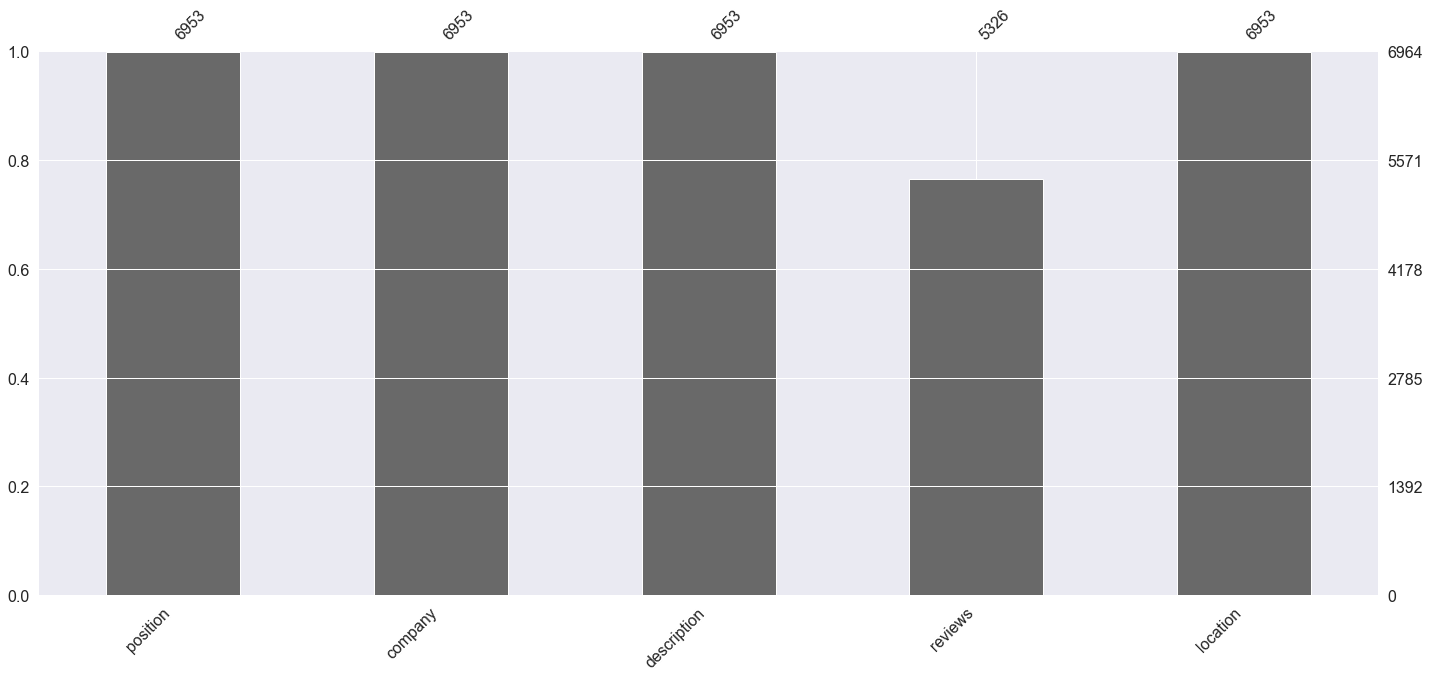

In [387]:
msno.bar(df)

In [388]:
df["reviews"] = df["reviews"].replace(np.nan, 0)
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [389]:
df.dropna(axis = "index", how = "any", inplace = True)
df.shape

(6953, 5)

In [390]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [391]:
round(df.describe())

,reviews
count,6953.0
mean,2435.0
std,7516.0
min,0.0
25%,2.0
50%,82.0
75%,705.0
max,148114.0


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      6953 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 325.9+ KB


In [393]:
df.rename(columns = {"location": "address"}, inplace=True)
df.head()

,position,company,description,reviews,address
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [394]:
df["state"] = df["address"].str.split(",", expand = True)[0]
df.head()

,position,company,description,reviews,address,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301",Atlanta
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA",Atlanta
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA",Atlanta
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta


In [395]:
df = df[["position", "company", "description", "reviews", "state", "address"]]
df.head()

,position,company,description,reviews,state,address
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,Atlanta,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,Atlanta,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,Atlanta,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,"Atlanta, GA"


Text(0.5, 1.0, 'Top 15 Most Marketable Careers \nin DataScience')

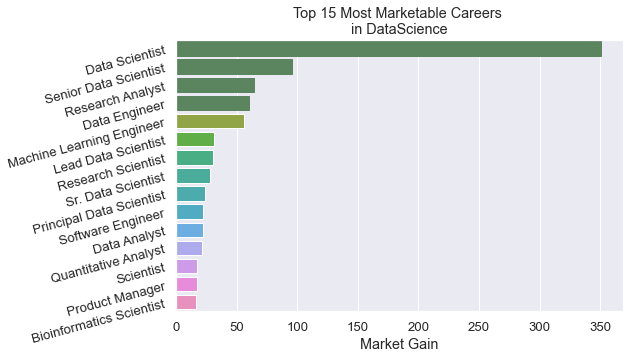

In [403]:
best_positions = df["position"].value_counts().to_frame().head(15)
best_positions
plt.figure(figsize = (8, 5))
bar = sb.barplot(y = best_positions.index, x = best_positions["position"], data = best_positions)
for x in bar.patches:
    if x.get_width() > 57.5: # Using mean of the current value_counts()
        x.set_color("#5a855f")
plt.yticks(rotation = 15)
plt.xlabel("Market Gain")
plt.title("Top 15 Most Marketable Careers \nin DataScience")

We can confidently suggest that Data Scientists are the most engineers in the Data Science job market with a wide gap from the 2nd runners up, the Senior Data Scientists followed by Research Analysts holfing 3rd position. 
Career wise I can reccommend Data Science or the top 5 marketable careers to a beginner / novice in this field.

Text(0.5, 1.0, 'Top Companies Hiring Engineers \nfrom the DataScience Field')

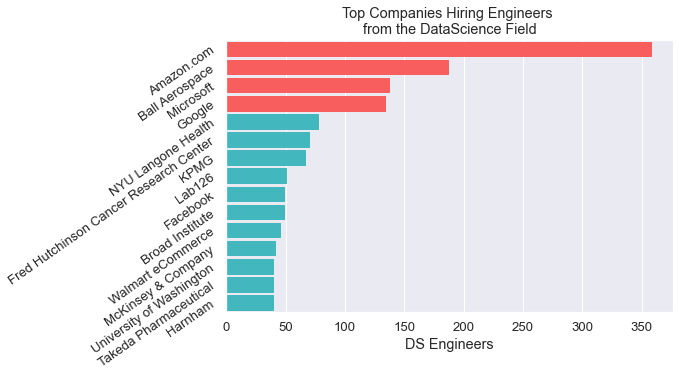

In [404]:
top_companies = df["company"].value_counts().to_frame().head(15)
top_companies
plt.figure(figsize = (8, 5))
bar = sb.barplot(y = top_companies.index, x = top_companies["company"], data = top_companies, color = "#42b7bd")
for x in bar.patches:
    if x.get_width() > 92: # Using mean of the current value_counts()
        x.set_color("#f85e5e")
    else:
        x.set_color("#42b7bd")
plt.yticks(rotation = 35)
plt.xlabel("DS Engineers")
plt.title("Top Companies Hiring Engineers \nfrom the DataScience Field")

For Engineers looking for hirirng companies, trying Amazon.com could be a jackpot as it holds a great number in hiring engineers from the Data Science field.
Ball Aerospace, Microsoft and Google also hold great records in hiring engineers in this field.

Text(0.5, 1.0, 'States companies with most \nData Science Engineers')

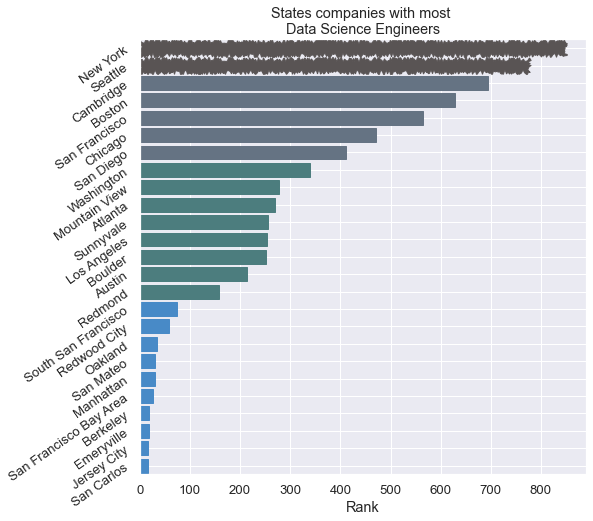

In [406]:
mkt_locations = df["state"].value_counts().to_frame().head(25)
mkt_locations
plt.figure(figsize = (8,8))
loc_bar = sb.barplot(y = mkt_locations.index, x = mkt_locations["state"], data = mkt_locations)
for i in loc_bar.patches:
    if i.get_width() > 700:
        i.set_sketch_params(scale = 1.9, length = 1.5)
        i.set_color("#595454")
    elif i.get_width() > 400:
        i.set_color("#657383")
    elif i.get_width() > 100:
        i.set_color("#4C7D7E")
    else:
        i.set_color("#488AC7")
plt.yticks(rotation = 35)
plt.xlabel("Rank")
plt.grid(b = True)
#plt.errorbar(y = mkt_locations.index, x = mkt_locations["state"])
plt.title("States companies with most \nData Science Engineers")

Apart from working from home, remotley engineers can locate to New York, Seattle, Cambridge, Boston and San Fransisco as tehy top in the list respectively. 

In [399]:
df[df["company"] == "Netflix"].head(10000)

,position,company,description,reviews,state,address
2243,Senior Data Scientist,Netflix,"Los Angeles, California\nScience and Analytics...",400.0,Los Angeles,"Los Angeles, CA"
2289,Senior Machine Learning Scientist,Netflix,"Los Angeles, California\nScience and Analytics...",400.0,Los Angeles,"Los Angeles, CA"
2340,"Senior Data Visualization Engineer, Finance An...",Netflix,"Los Angeles, California\nScience and Analytics...",400.0,Los Angeles,"Los Angeles, CA"


Text(0.5, 1.0, 'Top Positions Based on DS Job Market')

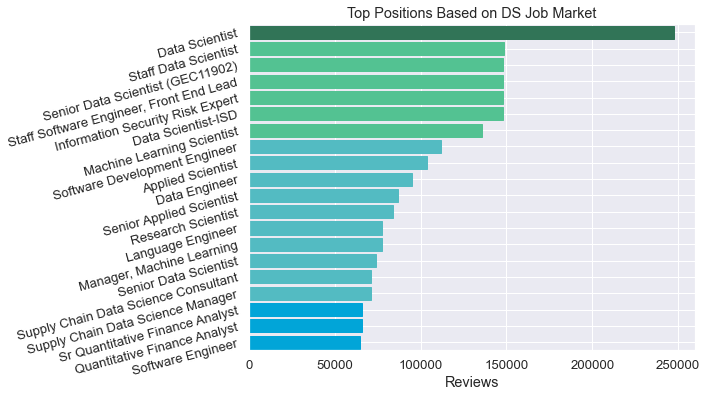

In [407]:
post_rev = df.groupby("position").agg({"reviews": "sum"}).sort_values(by = "reviews", ascending = False).rename(columns = {"reviews": "total_reviews"}).head(20)
plt.figure(figsize = (8, 6))
post_bar = sb.barplot(y = post_rev.index, x = post_rev["total_reviews"], data = post_rev)
for i in post_bar.patches:
    if i.get_width() > 200000:
        i.set_color("#317457")
    elif i.get_width() > 120000:
        i.set_color("#53c292")
    elif i.get_width() > 70000:
        i.set_color("#53bbc2")
    else:
        i.set_color("#01a5d8")
plt.ylabel(None)
plt.yticks(rotation = 15)
plt.xlabel("Reviews")
plt.grid(b = True)
plt.title("Top Positions Based on DS Job Market")

According to the survey data, Data Scientist are the most reviewed career in the DS Job Market

Text(500, 9.9999, 'Possible outlier')

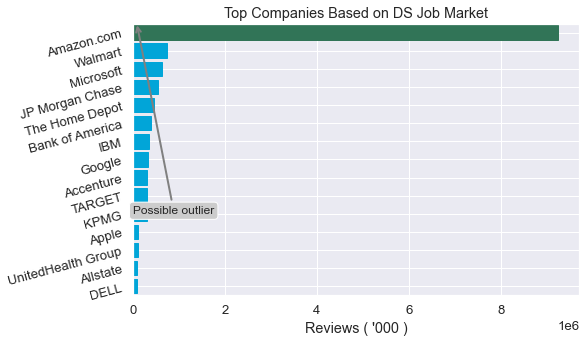

In [408]:
company_rev = df.groupby("company").agg("sum").sort_values(by = "reviews", ascending = False).rename(columns = {"reviews": "total_reviews"}).head(15)
company_rev
plt.figure(figsize = (8,5))
co_bar = sb.barplot(y = company_rev.index, x = company_rev["total_reviews"], data = company_rev)
for i in co_bar.patches:
    if i.get_width() > 6000000:
        i.set_color("#317457")
    else:
        i.set_color("#01a5d8")
plt.ylabel(None)
plt.yticks(rotation = 15)
plt.xlabel("Reviews ( '000 )")
plt.grid(b = True)
plt.title("Top Companies Based on DS Job Market")
co_bar.annotate('Possible outlier', xy = (80000,-0.5130), xytext = (500,9.9999), ha = "left", fontsize = 12, arrowprops = dict(arrowstyle = '->', ec = 'grey', lw = 2), bbox = dict(boxstyle="round", fc="0.8"))

Amazon holding the most reviewed company in the field, it also poses as an outlier causing statistical errors, though Walmart and Microsoft hold 2nd and 3rd positions respectively

Text(0.5, 1.0, 'Top States Based on DS Job Market')

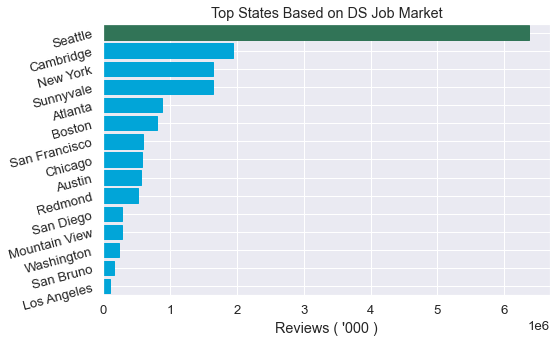

In [402]:
state_rev = df.groupby("state").agg("sum").sort_values(by = "reviews", ascending = False).rename(columns = {"reviews": "total_reviews"}).head(15)
state_rev
plt.figure(figsize = (8,5))
state_bar = sb.barplot(y = state_rev.index, x = state_rev["total_reviews"], data = state_rev)
for i in state_bar.patches:
    if i.get_width() > 6000000:
        i.set_color("#317457")
    else:
        i.set_color("#01a5d8")
plt.ylabel(None)
plt.yticks(rotation = 15)
plt.xlabel("Reviews ( '000 )")
plt.grid(b = True)
plt.title("Top States Based on DS Job Market")

Seattle had the top reviews followed by Cambridge, New York and Sunnyvale as the best states for engineers in this field.